<a href="https://colab.research.google.com/github/boddupallykavya9-cloud/FINANCIAL_DOC_QA_ASSISTANT/blob/main/customer_churn_analysis_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Customer Churn Analysis

This notebook performs an exploratory data analysis (EDA) and builds a predictive model to understand and predict customer churn in a telecommunications company.

## Data Loading and Inspection

First, we load the dataset and perform an initial inspection to understand its structure, check for missing values, and view the first few rows.

In [7]:
import pandas as pd
df = pd.read_csv('/content/Telco-Customer-Churn_dataset.csv')

In [8]:
print(df.head())
print(df.info())
print(df.isnull().sum())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

## Data Cleaning

Next, we check for and remove any duplicate rows in the dataset to ensure data integrity.

In [9]:
df.drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA)

We'll now explore the data to identify patterns, trends, and relationships that can help us understand customer churn.

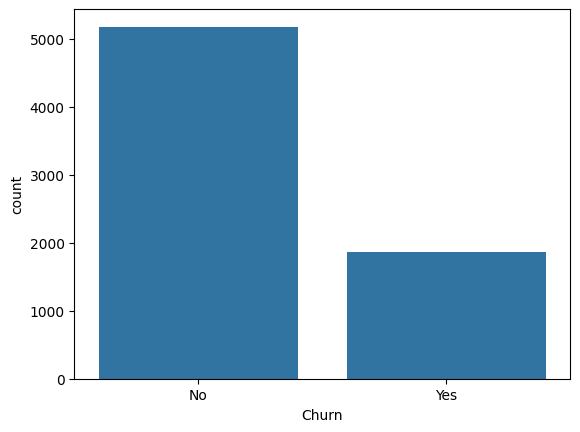

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Churn', data=df)
plt.show()

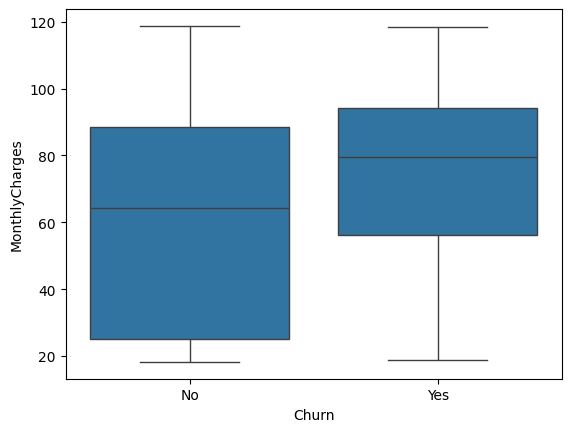

In [14]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.show()

Let's examine the relationship between `MonthlyCharges` and `Churn` using a boxplot.

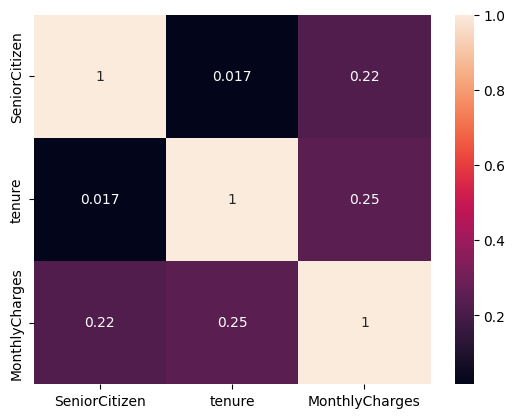

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True)
plt.show()

Let's examine the mean values of numerical features for customers who churned and those who did not.

In [17]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
grouped = df.groupby('Churn')[numeric_df.columns].mean()
print(grouped)

       SeniorCitizen     tenure  MonthlyCharges
Churn                                          
No          0.128721  37.569965       61.265124
Yes         0.254682  17.979133       74.441332


## Model Building

Now, we will prepare the data for modeling and build a logistic regression model to predict customer churn.

In [19]:
X = df.drop(['Churn', 'customerID'], axis=1)
X = pd.get_dummies(X)
y = df['Churn'].map({'Yes': 1, 'No': 0})

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
print(pd.Series(model.coef_[0], index=X.columns))

SeniorCitizen          0.079336
tenure                -0.030982
MonthlyCharges         0.000445
gender_Female         -0.073779
gender_Male           -0.133873
                         ...   
TotalCharges_997.75    0.000000
TotalCharges_998.1    -0.001507
TotalCharges_999.45    0.043117
TotalCharges_999.8    -0.059418
TotalCharges_999.9    -0.061458
Length: 6575, dtype: float64


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We will re-check for any missing values or duplicate rows in the dataset after initial processing.

In [20]:
print(df.isnull().sum())
print(df.duplicated().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
0


Let's visualize the distribution of the Churn variable to understand the class balance.

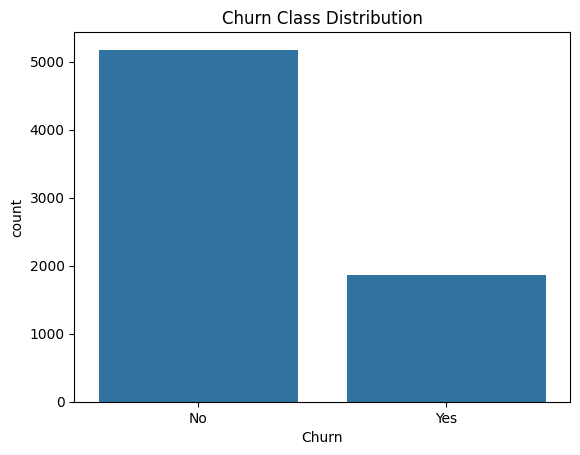

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title('Churn Class Distribution')
plt.show()

Let's examine the relationship between `MonthlyCharges`, `tenure`, and `Churn` through visualizations.

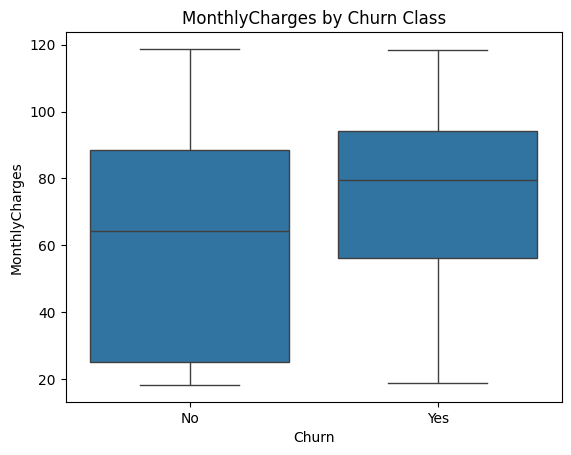

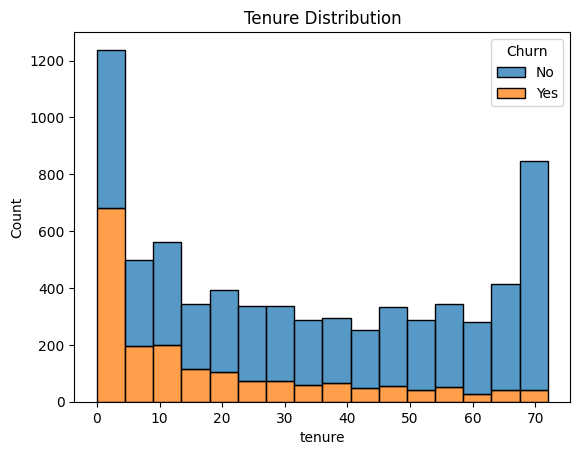

In [23]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('MonthlyCharges by Churn Class')
plt.show()
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack')
plt.title('Tenure Distribution')
plt.show()

Let's visualize the correlations between the numerical features.

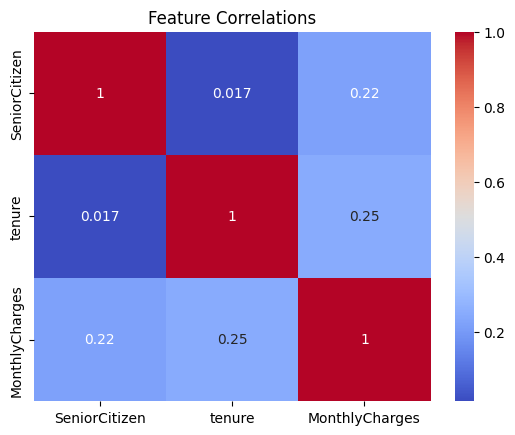

In [24]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

Let's examine the mean values of numerical features for customers who churned and those who did not.

In [25]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
print(df.groupby('Churn')[numeric_df.columns].mean())

       SeniorCitizen     tenure  MonthlyCharges
Churn                                          
No          0.128721  37.569965       61.265124
Yes         0.254682  17.979133       74.441332


In [26]:
X = df.drop(['Churn', 'customerID'], axis=1)
X = pd.get_dummies(X)
y = df['Churn'].map({'Yes': 1, 'No': 0})  # Adjust mapping if needed

This code splits the data into training and testing sets, initializes and trains a Logistic Regression model with an increased maximum number of iterations, and prints the feature importance (coefficients).

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
importance = pd.Series(model.coef_[0], index=X.columns)
print(importance.sort_values(ascending=False))

TotalCharges_20.2      1.506043
TotalCharges_20.5      1.320280
TotalCharges_19.95     1.221220
TotalCharges_20.1      1.203540
TotalCharges_19.6      1.138580
                         ...   
TotalCharges_335.75   -0.730391
TotalCharges_118.25   -0.736743
TotalCharges_50.15    -0.755526
TotalCharges_151.75   -0.827172
TotalCharges_44       -0.877083
Length: 6575, dtype: float64


## EDA Notes and Observations

Based on the exploratory data analysis, the following observations were made:

*   **Dataset Overview:** The dataset contains information about customer churn with several features including demographic information, services subscribed, contract details, and payment information.
*   **Missing Values and Duplicates:** No missing values or duplicate rows were found in the dataset, indicating a clean dataset for analysis.
*   **Churn Distribution:** The churn distribution shows that there is an imbalance in the target variable, with significantly more customers who did not churn compared to those who did churn. This imbalance should be considered during model building and evaluation.
*   **Monthly Charges and Churn:** Customers who churned tend to have higher monthly charges compared to those who did not churn, as seen in the box plot.
*   **Tenure and Churn:** The histogram shows that customers with shorter tenure are more likely to churn compared to those with longer tenure.
*   **Feature Correlations:** The heatmap of numerical features shows a moderate positive correlation between `tenure` and `MonthlyCharges`. `SeniorCitizen` has a weak positive correlation with `MonthlyCharges`.
*   **Churn by Numerical Features:** The mean values of numerical features grouped by churn status show that:
    *   Senior citizens have a higher churn rate.
    *   Customers who churned have significantly lower average tenure.
    *   Customers who churned have higher average monthly charges.

These observations provide valuable insights into the factors that might be influencing customer churn and will be helpful in building a predictive model.